## Practical Work 1

For this practical work, the student will have to develop a Python program that is able to implement the gradient descent in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#### Read RegData csv file into numpy array  (check your data)
##### Data source
https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/frames/frame.html


In [3]:
data = np.genfromtxt(r"C:\Users\DELL\Downloads\RegData.csv", delimiter=",")

#### Explore your data

In [4]:
x=data[:,0]
y=data[:,1]

#### Define variables X and y. Assign first column data to X and second column to y
<b>Note:</b> X is the independent variable (input to LR model) and y is the dependent variable (output)

#### Explore your data

#### Plot the original data (scatter plot of X,y)

<function matplotlib.pyplot.show(close=None, block=None)>

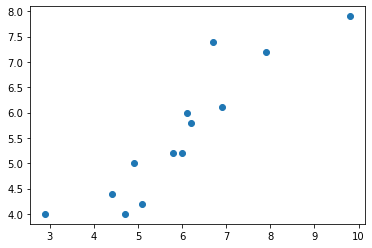

In [5]:
plt.scatter(x,y)
plt.show

## LR Full Implementation

### Step1: Initialize parameters (theta_0 & theta_1) with random value or simply zero. Also choose the Learning rate. 

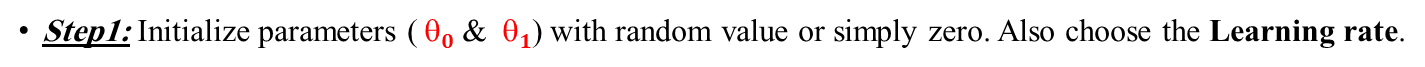

In [6]:
theta0=0
theta1=0
a=0.05

### Step2: Use (theta_0 & theta_1) to predict the output h(x)= theta_0 + theta_1 * x.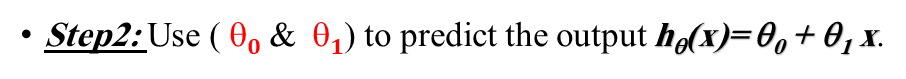
#### Note: you will need to iterate through all data points

In [7]:
def hx(x,o0,o1):    
    m=len(x)
    h=np.zeros(m)
    for i in range(m):
        h[i]=o0+o1*x[i]
    return h


### Step3: Calculate Cost function 𝑱(theta_0,theta_1 ).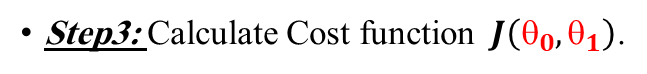
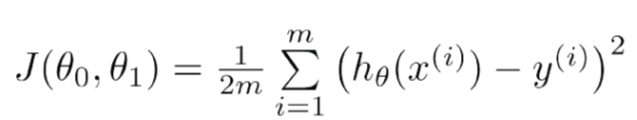

In [12]:
def j(x,y,o0,o1):
    m=len(x)                        
    summ=0
    h=hx(x,o0,o1)
    for i in range(m):
        summ+=(h[i]-y[i])**2
    j0=summ/(2*m)
    return j0

    

### Step4: Calculate the gradient.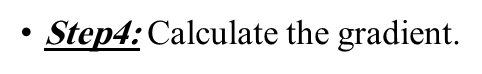
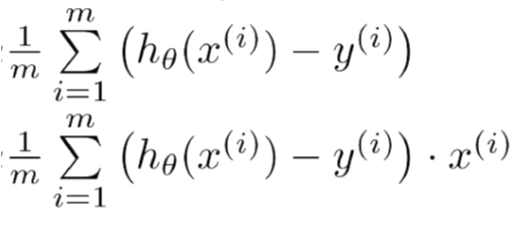

In [16]:
def dj(x,y,o0,o1):
    m=len(x)                      
    summ0=0
    summ1=0
    h=hx(x,o0,o1)
    for i in range(m):
        summ0+=(h[i]-y[i])
        summ1+=(h[i]-y[i])*x[i]
    dj0=summ0/(m)
    dj1=summ1/(m)
    return dj0,dj1

### Step5: Update the parameters (simultaneously).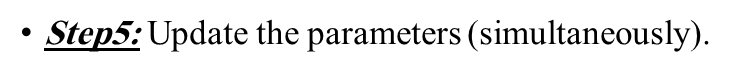
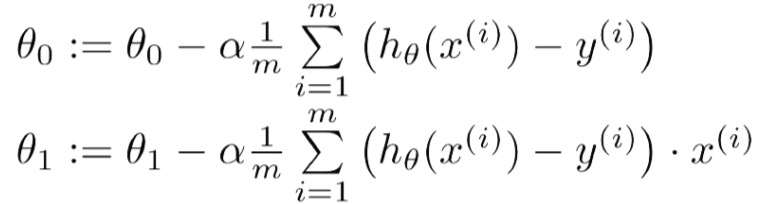

In [17]:
def lin_reg(x,y,o0,o1,a):
    o0=0
    o1=0
    m=len(x)
    fig=plt.figure()
    ax=fig.add_subplot(111)
    ax.scatter(x,y)

    ax.plot(np.arange(m),hx(np.arange(13),o0,o1)) 
    
    j2=j(x,y,o0,o1)
    j1=10**10                       
    n=0   
    it=[]
    while abs(j2-j1)>=0.000001 and n<10000:
        gr=dj(x,y,o0,o1)
        o0-=a*gr[0]
        o1-=a*gr[1]
        j1=j2
        j2=j(x,y,o0,o1)
        if n%10==0:
            ax.plot(np.arange(m),hx(np.arange(m),o0,o1)) #plot regression line every 20 iteration
        ax.set_ylabel("Y")
        ax.set_xlabel("X")
        it.append(n)
        n+=1
    print("minimum value of cost function is",j2,", number of iterations is",n)
    fig2=plt.figure()
    res=fig2.add_subplot(111)
    res.scatter(x,y)
    res.plot(np.arange(m),hx(np.arange(m),o0,o1))        #plot final regression line
    res.set_ylabel("Y")
    res.set_xlabel("X")
    plt.show()
    
    return o0,o1,it
    

### Step6: Repeat from 2 to 5 until converge to the minimum or achieve maximum iterations.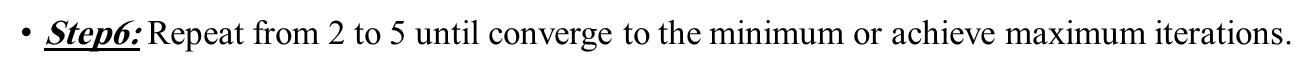

minimum value of cost function is 0.14259361501277515 , number of iterations is 867


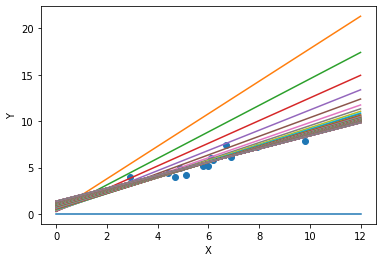

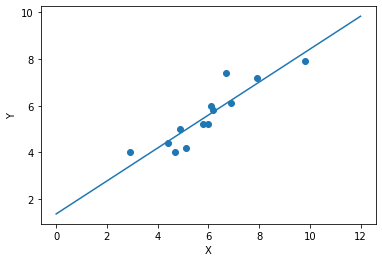

theta0 = 1.3706864388846962 theta1 = 0.7044421017075085
r2 score 0.821136197735372


In [18]:
theta0,theta1,it=lin_reg(x,y,theta0,theta1,a)
from sklearn.metrics import r2_score as r2
print("theta0 =",theta0,"theta1 =",theta1)
print("r2 score",r2(y,hx(x,theta0,theta1)))

#### Predict y values using the LR equation
##### h(x)= theta_0 + theta_1 * x

In [19]:
print(hx(x,theta0,theta1))

[3.4135686  6.09044839 4.8224528  6.93577911 8.27421917 6.23133701
 5.66778319 5.73822733 5.59733905 4.96334109 4.68156418 4.47023175
 5.45645076]


#### Plot  LR equation output (fitted line) with the original data (scatter plot of X,y)

In [20]:
print("r2 score =",r2(y,hx(x,theta0,theta1)))

r2 score = 0.821136197735372


#### Use R2 score to evaluate LR equation output
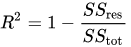
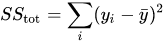
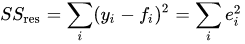
https://en.wikipedia.org/wiki/Coefficient_of_determination

## GD vectorize Implementation
### Implement GD without iterate through data points i.e. use vector operations

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

data = np.genfromtxt(r"C:\Users\DELL\Downloads\RegData.csv", delimiter=",")
x=data[:,0]
y=data[:,1]


theta0=0
theta1=0




<function matplotlib.pyplot.show(close=None, block=None)>

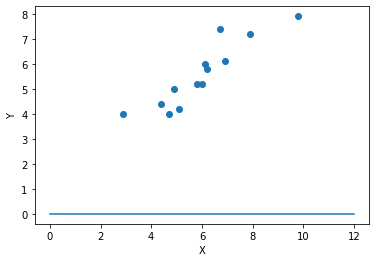

In [22]:
def h(x,o0,o1):                     #predicted values function
    return o0+o1*x

def j(x,y,o0,o1):                   #cost function
    hp=h(x,o0,o1)
    m=len(hp)
    return sum((hp-y)**2)/(2*m)

fig=plt.figure()
ax=fig.add_subplot(111)
ax.scatter(x,y)

ax.plot(np.arange(13),h(np.arange(13),theta0,theta1)) #regression line for initial guess
ax.set_ylabel("Y")
ax.set_xlabel("X")
plt.show

In [23]:
def lin_reg(x,y,theta0,theta1,a):   #linear regression function (ps: a is the learning rate)
    
    fig=plt.figure()
    ax=fig.add_subplot(111)
    ax.scatter(x,y)
    theta0=0
    theta1=0
    m=len(x)                        #number of data points
    ax.plot(np.arange(m),h(np.arange(m),theta0,theta1)) #regression line for initial guess
    
    j2=j(x,y,theta0,theta1)
    j1=10**10                       #i used j1 and j2 in the condition of the loop
    n=0
    it=[]
    jlist=[]
    while abs(j2-j1)>=0.000001:   #the loop will terminate when the value of j starts to get constant
        
        theta0=theta0-a*sum(h(x,theta0,theta1)-y)/(m)       #update the value theta0
        theta1=theta1-a*sum((h(x,theta0,theta1)-y)*x)/(m)   #update the value theta0
        jlist.append(j2)
        j1=j2
        j2=j(x,y,theta0,theta1)
        
        if n%20==0:
            ax.plot(np.arange(m),h(np.arange(m),theta0,theta1)) #plot regression line every 20 iteration
        ax.set_ylabel("Y")
        ax.set_xlabel("X")
        it.append(n)
        
        n+=1
        
    print("minimum value of cost function is",j2,", number of iterations is",n)
    fig2=plt.figure()
    res=fig2.add_subplot(111)
    res.scatter(x,y)
    res.plot(np.arange(m),h(np.arange(m),theta0,theta1))        #plot final regression line
    res.set_ylabel("Y")
    res.set_xlabel("X")
    plt.show()
    
    return theta0,theta1,it,jlist

minimum value of cost function is 0.14258665055235242 , number of iterations is 833


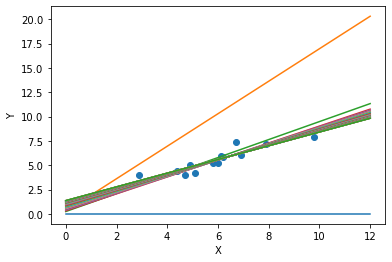

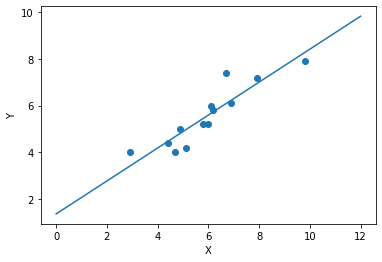

value of theta1 and theta2 is (1.3722491111733184, 0.7041635308038685)
R2 score is 0.8211449336796275


In [24]:
a=0.05
o0,o1,it,jlist=lin_reg(x, y, theta0, theta1,a)
print("value of theta1 and theta2 is",(o0,o1)) 
print("R2 score is",r2_score(y,h(x,o0,o1)))

#### Plot the output and calculate R2 score
##### Make sure that you obtained the same results

<function matplotlib.pyplot.show(close=None, block=None)>

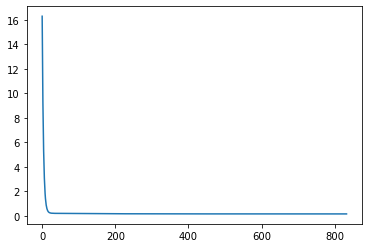

In [26]:
plt.plot(it,jlist)
plt.show


## Plot loss function
### Repeat your last vectorized implementaion version and save loss for each iteration (epoch)

### Plot loss vs. iterations

## Multivariate LR

#### Read MultipleLR csv file into numpy array  (check your data)
##### Data source
https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/frames/frame.html


In [27]:
data2 = np.genfromtxt(r"C:\Users\DELL\Downloads\MultipleLR.csv", delimiter=",")

x=np.hstack((np.ones((len(data2),1)),data2[:,0:3]))
y=data2[:,3]


theta=np.zeros(4)


In [28]:
def h(x,theta):
    return x@theta


In [29]:
def j(x,y,theta):
    m=len(y)
    return sum((1/(2*m))*(h(x,theta)-y)**2)


In [30]:
def dj(x,y,theta):
    m=len(y)
    return (1/(m))*(h(x,theta)-y)@x
print(dj(x,y,theta))

[  -162.04 -13075.8  -13147.2  -13467.08]


In [31]:
def lin_reg(x,y,theta,a):
    theta=np.zeros(4)
    j1=10**12
    j2=j(x,y,theta)
    n=0
    it=[]
    jlist=[]
    while abs(j2-j1)>0.000001 and n<10000:
        theta=theta-a*dj(x,y,theta)
        j1=j2
        j2=j(x,y,theta)
        n+=1
        it.append(n)
        jlist.append(j2)
        
    print("minimum value of cost function is",j2,"with",n,"iterations")
    return theta,jlist,it

theta1,jlist,it=lin_reg(x,y,theta,0.000101)
print("R2 =",r2_score(y,h(x,theta1)))
print(theta1)


minimum value of cost function is 3.048837524567578 with 3495 iterations
R2 = 0.989013166435912
[-0.01753906  0.35955161  0.52862539  1.12550846]


### Repeat your implementation but for more than one variable

#### Predict y values using the LR equation
##### h(x)= theta_0 + theta_1 * x1 + theta_2 * x2 + theta_3 * x3

### Plot loss vs. iterations

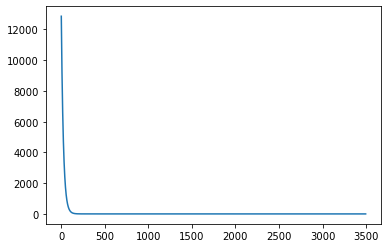

In [32]:
plt.plot(it,jlist)
plt.show()

#### Use R2 score to evaluate LR equation output

# Bonus
## LR Using sklearn

### Single Variable

#### Build a LR model usin linearmodel.LinearRegression() from sklearn library

In [33]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(x, y)
reg.score(x,y)

0.9896615789448399

#### Train the model (fit the model to the training data)

#### Predict y values using the trained model

In [34]:
y_pred=reg.predict(x)
print(y_pred)

[152.60720439 185.08011472 181.78158547 199.74522647 139.1747207
 103.69391793 150.2632274  112.82069728 174.55948394 164.49442094
 143.42337551 142.23416416 186.54285759 152.40794527 151.24409108
 189.12496613 143.50219218 181.89389361 177.29838914 158.34934019
 176.57742415 174.66365778 167.68889392 150.63279846 191.1954116 ]


#### Plot model output (fitted line) with the original data (scatter plot of X,y)

#### Use R2 score to evaluate model output

In [35]:
print(r2(y,y_pred))

0.9896615789448399


### Repeat for Mulivariate